In [3]:
#https://gisdata.fultoncountyga.gov/datasets/JohnsCreekGA::financial-expenditures/data

from arcgis.gis import GIS

gis = GIS("https://www.arcgis.com", "arcgis_python", "P@ssword123")

import json
import urllib.request
from urllib.parse import urlparse


jc_data = "https://opendata.arcgis.com/datasets/805dee052b8e403ab1e8b426a4fd75cf_0.geojson"
outfile = "jc_data.json"
    
urllib.request.urlretrieve(jc_data, outfile)

print ("Downloaded")

Downloaded


In [4]:
with open(outfile, "r") as read_file:
    data = json.load(read_file)

In [42]:
import pandas as pd

current_data = "[" #an array of {},

index = 0

for f in data['features']:
    
    if (f['properties']['FiscalYear'] == 2019):
        temp = f['properties']
        
        current_data += json.dumps(temp)
        current_data += ","
        index +=1

current_data = current_data[:-1] #less ","
current_data += "]"
  
df = pd.read_json (current_data)

,Amount,Bucket,Category,CreditAmount,Department,DepartmentCode,Description,DraftAmount,ExpenseCategory,ExpenseType,...,PaymentMonthYear,PaymentStatus,Program,ProgramCode,SequenceCode,ServiceCode,SubCategory,Vendor,VendorID,VendorZip
0,1.89,Operations Expenditures,Purchased/Contracted Services,0,Recreation,6110,REDBOX DVD RENTAL,1.89,Hospitality,Operating Expense,...,2018/10 (Oct.),NA,Other,5239001,11,100,Other Purchased Services,BANK OF AMERICA,145,30097
1,258.32,Operations Expenditures,Supplies,0,Police Administration,3210,ELITE K9 INC 2,258.32,Officer Supplies,Operating Expense,...,2018/10 (Oct.),NA,Other,5317011,21,100,Supplies,BANK OF AMERICA,145,30097
2,136.00,Operations Expenditures,Supplies,0,Fire,3510,RENTAL PLACE,136.00,Other,Operating Expense,...,2018/10 (Oct.),NA,Other,5317000,51,100,Supplies,BANK OF AMERICA,145,30097
3,27.14,Operations Expenditures,Purchased/Contracted Services,0,City Clerk,1330,SUPERSHUTTLE EXECUCARLAX,27.14,Travel,Operating Expense,...,2018/10 (Oct.),NA,Travel,5235000,33,100,Other Purchased Services,BANK OF AMERICA,145,30097
4,205.40,Operations Expenditures,Purchased/Contracted Services,0,Fire,3510,THE HOME DEPOT 174,205.40,Education & Training,Operating Expense,...,2018/10 (Oct.),NA,Education & Training,5237000,51,100,Other Purchased Services,BANK OF AMERICA,145,30097
5,-344.40,Operations Expenditures,Supplies,344,Fire,3510,AMZN Mktp US,0.00,Officer Supplies,Operating Expense,...,2018/10 (Oct.),NA,Other,5317011,51,100,Supplies,BANK OF AMERICA,145,30097
6,67.49,Operations Expenditures,Supplies,0,Police Administration,3210,5.11 TACTICAL ALPHARETTA,67.49,Uniforms,Operating Expense,...,2018/10 (Oct.),NA,Other,5317010,21,100,Supplies,BANK OF AMERICA,145,30097
7,145.98,Operations Expenditures,Supplies,0,Police Administration,3210,GALLS,145.98,Uniforms,Operating Expense,...,2018/10 (Oct.),NA,Other,5317010,21,100,Supplies,BANK OF AMERICA,145,30097
8,383.21,Operations Expenditures,Purchased/Contracted Services,0,Recreation,6110,KOMPAN INC. Newtown Park - Mat,383.21,Repairs & Maintenance,Operating Expense,...,2018/10 (Oct.),IS,Repairs & Maintenance,5222000,11,100,Purchased-Property Services,KOMPAN INC.,1346,98402
9,1662.50,Operations Expenditures,Supplies,0,Recreation,6110,THREE GUYS ENTE FFF - RENTAL D,1662.50,Operating Supplies,Operating Expense,...,2018/10 (Oct.),IS,Other,5317003,11,100,Supplies,THREE GUYS ENTERTAINMENT LLC,1140,30024


In [74]:
dd = df.groupby(['Department'])
gd = dd.sum()
dpt_spend = gd['Amount']

frame = { 'City Department Spending': dpt_spend}
result = pd.DataFrame(frame)
total = result['City Department Spending'].sum()

result['Percentage'] = (result['City Department Spending']/total)*100

result = result.sort_values(by=['Percentage'],ascending=False)
result.head(80)

,City Department Spending,Percentage
Department,,
Capital Projects - City Hall,8746510.42,17.847119
Capital Projects Fund (New),8336807.29,17.011126
Fire,6498941.66,13.260990
Police Administration,6261082.16,12.775641
Maintenance Accruals Fund,5460554.94,11.142178
Public Works Operations,4660441.21,9.509558
Recreation,1298495.94,2.649561
Data Processing/ MIS,1295891.18,2.644246
Planning & Zoning,1269411.61,2.590215


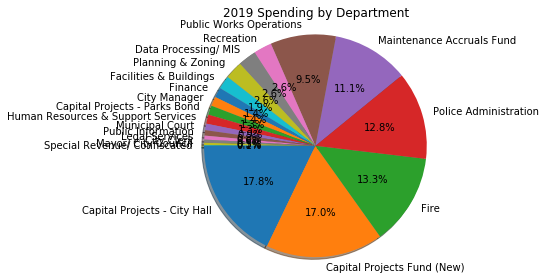

In [103]:
import matplotlib.pyplot as plt

departments = list(result.index)
percentage = result['Percentage']

#for i in range(0,len(percentage)):
#    if (percentage[i] < 3):
#        departments[i] = ""

plt.title("2019 Spending by Department")

plt.pie(percentage, labels=departments, autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")
plt.tight_layout()

#plt.legend(loc="upper right")

plt.show()

In [126]:
de = df.groupby(['Vendor'])
ge = de.sum()
dptv_spend = ge['Amount']

frame = { 'Vendor Spending': dptv_spend}
resultv = pd.DataFrame(frame)
total = resultv['Vendor Spending'].sum()

resultv['Percentage'] = (resultv['Vendor Spending']/total)*100

resultv = resultv.sort_values(by=['Percentage'],ascending=False)
resultv.head(20)

resultv.loc['KIMBERLY SNOW SAUNDERS']
resultv.loc['APPEN NEWSPAPERS INC']


Vendor Spending    7877.100000
Percentage            0.016073
Name: APPEN NEWSPAPERS INC, dtype: float64

In [119]:
dh = df.groupby(['ExpenseCategory'])
gh = dh.sum()
gh.head(200)

print (gh.loc['Gym Membership']['Amount'])
print (gh.loc['Uniforms']['Amount'])
print (gh.loc['Hospitality']['Amount'])
print (gh.loc['Car Allowance']['Amount'])


12390.0
85091.87999999995
38155.38
30480.0
